<a href="https://colab.research.google.com/github/Hyuk-Jung-Newbie/individual-repoting_JH/blob/main/%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C_%ED%95%9C%EC%8B%9D%EB%B6%84%EB%A5%98_%EC%A0%95%ED%98%81_v0_43_0901_CNN_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/MyDrive/KU_LGCNS21/K-FOOD

/content/drive/MyDrive/KU_LGCNS21/K-FOOD


In [ ]:
pip install imageio

In [ ]:
import tensorflow as tf
import numpy as np
from skimage import io
from skimage.transform import rescale,resize,downscale_local_mean
import cv2
import os
import PIL
from PIL import Image
import tensorflow_datasets as tfds
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import drive
from imageio import imread
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is /content/drive/MyDrive/KU_LGCNS21/K-FOOD


In [ ]:
# Training set folder 

paths = {"1.Stir-fried eggplant","2.Soy Sauce Marinated Crab","3.Grilled Short Ribs","4.Braised Short Ribs","5.Short rib soup",
         "6.Grilled hairtail","7.Braised Cutlassfish","8.potato pancake","9.Braised potatoes","10.Stir-fried shredded potatoes"}
         
# The reshape size
imgsize = [100, 100]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(paths):
    print (" [%d/%d] %s/%s" % (i, len(paths), cwd, path)) 

print ("Data will be saved to %s" 
       % (cwd + '/data/' + data_name + '.npz'))

Your images should be at
 [0/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/4.Braised Short Ribs
 [1/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/8.potato pancake
 [2/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/3.Grilled Short Ribs
 [3/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/1.Stir-fried eggplant
 [4/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/10.Stir-fried shredded potatoes
 [5/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/5.Short rib soup
 [6/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/6.Grilled hairtail
 [7/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/2.Soy Sauce Marinated Crab
 [8/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/9.Braised potatoes
 [9/10] /content/drive/MyDrive/KU_LGCNS21/K-FOOD/7.Braised Cutlassfish
Data will be saved to /content/drive/MyDrive/KU_LGCNS21/K-FOOD/data/custom_data.npz


In [ ]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

In [ ]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = sorted(os.listdir(path))
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)        
        ## open cv 이용
        try:
          currimg=cv2.imread(fullpath, cv2.IMREAD_GRAYSCALE)
          currimg_small=cv2.resize(currimg, (100, 100))
        except Exception as e:
          print(str(e))
          continue      
        currimgvec   = np.reshape(currimg_small, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = currimgvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, currimgvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion faile

DIVIDE TOTAL DATA INTO TRAINING AND TEST SET

In [ ]:
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (5993, 10000)
Shape of 'trainlabel' is (5993, 10)
Shape of 'testimg' is (3996, 10000)
Shape of 'testlabel' is (3996, 10)


SAVE TO NPZ

In [ ]:
# The reshape size를 [100,100]으로 변형
imgsize = [100, 100]

savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel, testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print ("Saved to %s" % (savepath))

Saved to /content/drive/MyDrive/KU_LGCNS21/K-FOOD/data/custom_data.npz


LOAD TO CHECK!

In [ ]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath,allow_pickle=True) ##allow_pickle = true 추가
1
# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

5993 train images loaded
3996 test images loaded
Loaded from to /content/drive/MyDrive/KU_LGCNS21/K-FOOD/data/custom_data.npz


PLOT RANDOMLY SELECTED TRAIN IMAGES

In [ ]:
print(trainimg_loaded.shape)

(5993, 10000)


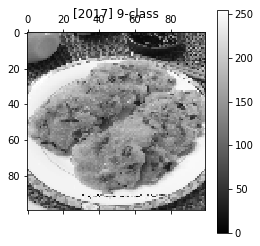

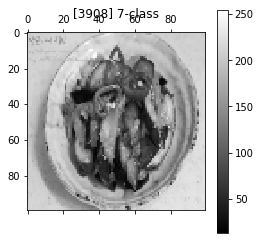

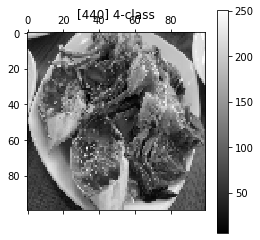

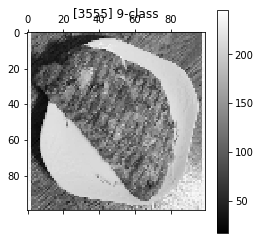

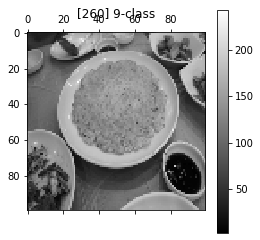

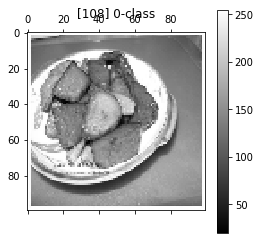

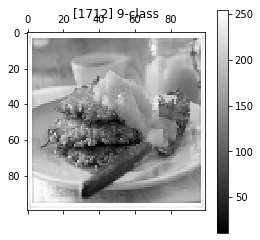

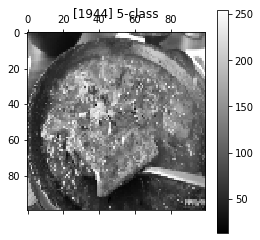

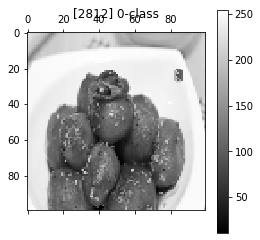

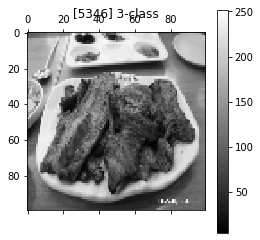

In [ ]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

PLOT RANDOMLY SELECTED TEST IMAGES

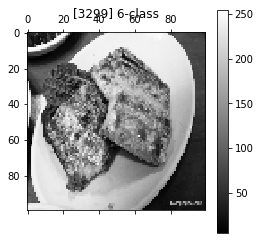

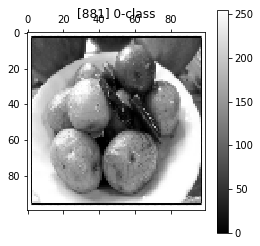

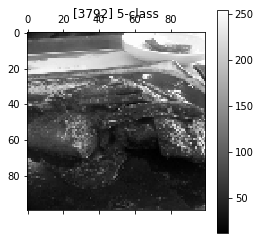

In [ ]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

CONVOLUTIONAL NEURAL NETWORK WITH CUSTOM DATA

In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Packages loaded")

Packages loaded


LOAD DATA for CONVOLUTIONAL NEURAL NETWORK 

In [4]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/custom_data.npz"
l = np.load(loadpath)

# See what's in here
print (l.files)

# Parse data
trainimg = l['trainimg']
trainlabel = l['trainlabel']
testimg = l['testimg']
testlabel = l['testlabel']
imgsize = l['imgsize']
use_gray = l['use_gray']
ntrain = trainimg.shape[0]
nclass = trainlabel.shape[1]
dim    = trainimg.shape[1]
ntest  = testimg.shape[0]
print ("%d train images loaded" % (ntrain))
print ("%d test images loaded" % (ntest))
print ("%d dimensional input" % (dim))
print ("Image size is %s" % (imgsize))
print ("%d classes" % (nclass))

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray']
5993 train images loaded
3996 test images loaded
10000 dimensional input
Image size is [100 100]
10 classes


DEFINE NETWORK

In [5]:
tf.random.set_seed(2021)
n_input  = dim
n_output = nclass
if use_gray:
    weights  = {
        'wc1': tf.Variable(tf.random.normal([5, 5, 1, 128], stddev=0.1)),
        'wc2': tf.Variable(tf.random.normal([5, 5, 128, 128], stddev=0.1)),
        'wd1': tf.Variable(tf.random.normal(
                [(int)(imgsize[0]/4*imgsize[1]/4)*128, 128], stddev=0.1)),
        'wd2': tf.Variable(tf.random.normal([128, n_output], stddev=0.1))
    }
else:
    weights  = {
        'wc1': tf.Variable(tf.random.normal([5, 5, 3, 128], stddev=0.1)),
        'wc2': tf.Variable(tf.random.normal([5, 5, 128, 128], stddev=0.1)),
        'wd1': tf.Variable(tf.random.normal(
                [(int)(imgsize[0]/4*imgsize[1]/4)*128, 128], stddev=0.1)),
        'wd2': tf.Variable(tf.random.normal([128, n_output], stddev=0.1))
    }
biases   = {
    'bc1': tf.Variable(tf.random.normal([128], stddev=0.1)),
    'bc2': tf.Variable(tf.random.normal([128], stddev=0.1)),
    'bd1': tf.Variable(tf.random.normal([128], stddev=0.1)),
    'bd2': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}


In [6]:
def conv_basic(_input, _w, _b, _keepratio, _use_gray):
    # INPUT
    if _use_gray:
        _input_r = tf.reshape(_input, shape=[-1, imgsize[0], imgsize[1], 1])
    else:
        _input_r = tf.reshape(_input, shape=[-1, imgsize[0], imgsize[1], 3])
    # CONVOLUTION LAYER 1
    _conv1 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(_input_r
        , _w['wc1'], strides=[1, 1, 1, 1], padding='SAME'), _b['bc1']))
    _pool1 = tf.nn.max_pool(_conv1, ksize=[1, 2, 2, 1]
        , strides=[1, 2, 2, 1], padding='SAME')
    _pool_dr1 = tf.nn.dropout(_pool1, _keepratio)
    # CONVOLUTION LAYER 2
    _conv2 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(_pool_dr1
        , _w['wc2'], strides=[1, 1, 1, 1], padding='SAME'), _b['bc2']))
    _pool2 = tf.nn.max_pool(_conv2, ksize=[1, 2, 2, 1]
        , strides=[1, 2, 2, 1], padding='SAME')
    _pool_dr2 = tf.nn.dropout(_pool2, _keepratio)
    # VECTORIZE
    _dense1 = tf.reshape(_pool_dr2
                         , [-1, _w['wd1'].get_shape().as_list()[0]])
    # FULLY CONNECTED LAYER 1
    _fc1 = tf.nn.relu(tf.add(tf.matmul(_dense1, _w['wd1']), _b['bd1']))
    _fc_dr1 = tf.nn.dropout(_fc1, _keepratio)
    # FULLY CONNECTED LAYER 2
    _out = tf.add(tf.matmul(_fc_dr1, _w['wd2']), _b['bd2'])
    # RETURN
    out = {
        'input_r': _input_r, 'conv1': _conv1, 'pool1': _pool1
        , 'pool1_dr1': _pool_dr1, 'conv2': _conv2, 'pool2': _pool2
        , 'pool_dr2': _pool_dr2, 'dense1': _dense1, 'fc1': _fc1
        , 'fc_dr1': _fc_dr1, 'out': _out
    }
    return out
print ("NETWORK READY")

NETWORK READY


In [ ]:
x

<tf.Tensor 'Placeholder_3:0' shape=(?, 10000) dtype=float32>

DEFINE FUNCTIONS

In [ ]:
##★★★★★★★★★ tf v2방식으로 다시 작업하는 것에 대해서 시도해봤지만, 실패해서 도움을 요청드립니다

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])
keepratio = tf.placeholder(tf.float32)

# Functions! 
_pred = conv_basic(x, weights, biases, keepratio, use_gray)['out']
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=_pred,labels=y))
WEIGHT_DECAY_FACTOR = 0.0001
l2_loss = tf.add_n([tf.nn.l2_loss(v) 
            for v in tf.trainable_variables()])
cost = cost + WEIGHT_DECAY_FACTOR*l2_loss
optm = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
_corr = tf.equal(tf.argmax(_pred,1), tf.argmax(y,1)) # Count corrects
accr = tf.reduce_mean(tf.cast(_corr, tf.float32)) # Accuracy
init = tf.initialize_all_variables()
print ("FUNCTIONS READY")

AttributeError: ignored

OPTIMIZE

In [ ]:
# Parameters
training_epochs = 400
batch_size      = 100
display_step    = 40

##★★★★★★★★★ tf.Session을 대체해서, 어떻게 sses.run을 쓸지 모르겠습니다. 구글링에서는 tf.function으로 대체하라는데 잘 모르겠습니다

# Launch the graph
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    num_batch = int(ntrain/batch_size)+1
    # Loop over all batches
    for i in range(num_batch): 
        randidx = np.random.randint(ntrain, size=batch_size)
        batch_xs = trainimg[randidx, :]
        batch_ys = trainlabel[randidx, :]                
        # Fit training using batch data
        sess.run(optm, feed_dict={x: batch_xs, y: batch_ys
                                  , keepratio:0.7})
        # Compute average loss
        avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys
                                , keepratio:1.})/num_batch

    # Display logs per epoch step
    if epoch % display_step == 0 or epoch == training_epochs-1:
        print ("Epoch: %03d/%03d cost: %.9f" % 
               (epoch, training_epochs, avg_cost))
        train_acc = sess.run(accr, feed_dict={x: batch_xs
                                , y: batch_ys, keepratio:1.})
        print (" Training accuracy: %.3f" % (train_acc))
        test_acc = sess.run(accr, feed_dict={x: testimg
                                , y: testlabel, keepratio:1.})
        print (" Test accuracy: %.3f" % (test_acc))
print ("Optimization Finished!")

AttributeError: ignored

In [ ]:
# CLOSE SESSION
sess.close()
print ("Session closed.")

NameError: ignored